# Your feedback

**Go to [this online form](https://forms.gle/wQMj2GV4XPFNJEuS7) and fill the Survey "_Mid Term Feedback"_.**

# Overview

In this class, we will learn more about networks. You will get an overview of concepts such as Assortativity, Centrality and Communities.
The lecture is structured as follows.

* __Part 1__: Learn about Centrality and Assortativity with a lecture from Sune. Apply the concepts to undertand a bit more about the structure of our network of Computational Social Scientists.  
* __Part 2__: Learn about Community Detection with a lecture from Sune and an exercise related to the famous [Zachary Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Then, apply what you have learned to study the network of Computational Social Scientists.


# Part 1: Centrality and Assortativity

We will start by learning about some advanced concepts in network science: Centrality and Assortativity. Then, we will apply these concepts to learn a bit more about our network of scientsits. 

> **_Video lecture:_** [Network measures.](https://www.youtube.com/watch?v=IOWXZFOyk9Y)
>
> **_Reading_**: Learn about assortativity by reading [Chapter 7](http://networksciencebook.com/chapter/7#introduction7). The important parts are in sections [7.2](http://networksciencebook.com/chapter/7#assortativity) and [7.3](http://networksciencebook.com/chapter/7#measuring-degree).

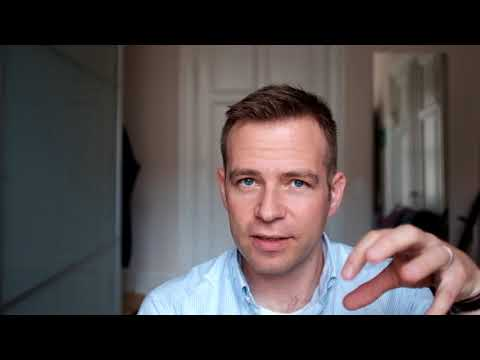

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=600)

Let's dig in and try to understand more about the network of Computational Social Scientists using more advanced features. If your network has more than one component, just work on the giant connected component (GCC) in the exercises below. For the exercises below, you shall use the network you built in [Week 4](https://github.com/lalessan/comsocsci2023/blob/main/lectures/Week4.ipynb).


> **Exercise 1: Mixing Patterns and Assortativity.** 
>
> * For each node, compute the fraction of edges that connect to a node that works in the same top field. Find the average value across all nodes.
> * Create a new graph, with the same nodes and edges, but where the association between nodes and field is shuffled. Compute the measure above for this randomized graph.
> * Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Is the chance to connect to a member of the same field significantly higher than it would be by chance?
> * Compute the assortativity coefficient with respect to author's field. How do you interpret the value you obtain? (__Hint__: See [this paper](https://nbviewer.org/github/suneman/socialgraphs2019/blob/master/lectures/Week5.ipynb), eq (2)). **Important**: here I do not want you to use the NetworkX implementation, but rather to implement your own version of the measure.    
> * Is the graph assortative with respect to the degree? (e.g. do high-degree scientists tend to link to other high-degree scientists, and low-degree scientists to other low-degree scientists?). Provide an interpretation of your answer.
> * _Optional:_ Estimate the gender of each author from their name, using the [World Gender Name Dictionary](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/MSEGSJ). Repeat the analysis above to study the assortativity of the network by gender rather than by field. What do you observe?

> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play? 
> * Find the 5 most central scientists according to eigenvector centrality.     
> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?    
> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw

# Load the data
with open('CSS_field.pkl', 'rb') as f:
    G = pickle.load(f)


In [5]:
def calc_frac(graph, fields):
    fracs = []
    for node in graph.nodes:
        c = 0
        for neighbor in G.neighbors(node):
            if fields[neighbor] == fields[node] and fields[neighbor] != 'unknown':
                c += 1
        fracs.append(c/G.degree(node))

    return np.mean(fracs)

def frac_same_field(graph):
    fields = nx.get_node_attributes(graph, 'field')
    return calc_frac(graph, fields)


In [6]:
avg = frac_same_field(G)
avg

0.649013259809336

In [72]:
import random
random.seed(42)

def frac_rand_graph(graph):
    fields = nx.get_node_attributes(graph, 'field')
    field_list = list(fields.values())
    for key in fields.keys():
        fields[key] = random.choice(field_list)

    return calc_frac(graph, fields)

avg_rand = frac_rand_graph(G)
avg_rand

0.12429924053289076

In [73]:
# 100 times
fracs_rand_100 = [np.mean(frac_rand_graph(G)) for _ in range(100)]

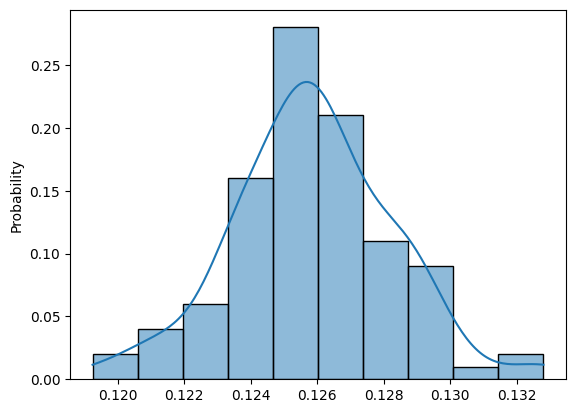

In [74]:
import seaborn as sns
plt.figure()
sns.histplot(fracs_rand_100, bins=10, stat='probability', label='Random', kde=True)
plt.show()

In [92]:
import pandas as pd
dictField = nx.get_node_attributes(G, "field")
FIELDS = set(list(dictField.values()))

def matrix_assort(dictField):
    myDict = {key: [] for key in set(list(dictField.values()))}
    for node in G.nodes:
        field = dictField[node]
        for nei in G.neighbors(node):
            myDict[field].append(dictField[nei])

    for felt in FIELDS:
        listCount = []
        for innerfelt in FIELDS:
            listCount.append(myDict[felt].count(innerfelt))
        myDict[felt] = dict(zip( list(FIELDS), listCount ) )
    
    return myDict

def aac(dF):
    dicto = matrix_assort(dictField=dF)
    dfMatrix = pd.DataFrame.from_dict(dicto)/642302 # to percent
    M = np.array(dfMatrix)
    OWN_ASSORT = (np.trace(M) - np.sum(M.sum(axis=0)**2))/(1- np.sum(M.sum(axis=0)**2))
    return OWN_ASSORT

my_aac = aac(dictField)



In [93]:
print('Own calculated assort.', my_aac)

Own calculated assort. 0.7997730835339198


In [94]:
dac = nx.degree_assortativity_coefficient(G)
dac

0.9271786416131098

> **Exercise 2: Central nodes.** Remember to write your answers in the notebook. 
> * Find the 5 most central scientists according to the closeness centrality. What role do you imagine scientists with high closeness centrality play? 
> * Find the 5 most central scientists according to eigenvector centrality.     
> * Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why?    
> * Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

In [95]:
CC = nx.closeness_centrality(G)

In [103]:
# Python program to demonstrate
# finding 3 highest values in a Dictionary
from heapq import nlargest

# Initial Dictionary

MCS_5 = nlargest(5, CC, key = CC.get)

print("Dictionary with 3 highest values:")
print("Keys: Values")

for val in MCS_5:
	print(val, ":", CC.get(val))


Dictionary with 3 highest values:
Keys: Values
3185333 : 0.25574560639686467
1783914 : 0.25360196154152115
80273596 : 0.2484803504746811
1925509 : 0.2421196442150161
2157480 : 0.2414698785311571


In [104]:
EC = nx.eigenvector_centrality(G)

In [106]:
MCS_5EC = nlargest(5, EC, key = EC.get)

print("Dictionary with 3 highest values:")
print("Keys: Values")

for val in MCS_5EC:
	print(val, ":", EC.get(val))

Dictionary with 3 highest values:
Keys: Values
38049428 : 0.044715063803087075
39812858 : 0.044668377547205665
80717552 : 0.044668377547205665
3363887 : 0.044668377547205665
2114751 : 0.044668377547205665


# Part 2: Community detection.

We will continue the analysis of our network of Computational Social Scientists.
We will start by learning about community detection with a lecture from Sune.

> **_Video Lecture_**: Communities in networks. 


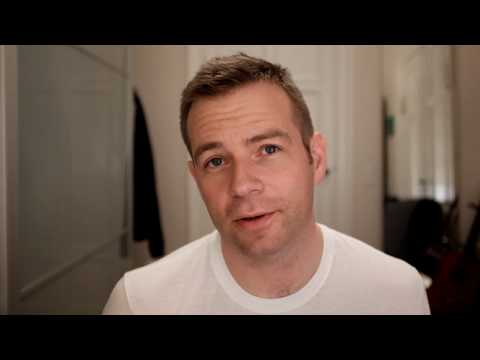

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

> **_Reading_**: [Chapter 9 of the NS book.](http://networksciencebook.com/chapter/9). You can skip sections 9.3, 9.5 and 9.7. 



> __Exercise 3: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html) 
>
> 1. Visualize the graph using [netwulf](https://netwulf.readthedocs.io/en/latest/). Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.
>
> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.
> 3. Explain in your own words the concept of _modularity_. 
> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.
> 5. We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from $0$. To do so, we will implement the _double edge swap_ algorithm. The _double edge swap_ algorithm is quite old... it was implemented in 1891 (!) by Danish mathematician Julius Petersen(https://en.wikipedia.org/wiki/Julius_Petersen). Given a network G, this algorithm creates a new network, such that each node has exactly the same degree as in the original network, but different connections. Here is how the algorithm works.
>       * __a.__ Create an identical copy of your original network.
>       * __b.__ Consider two edges in your new network (u,v) and (x,y), such that u!=v and v!=x.
>       * __c.__ If none of edges (u,y) and (x,v) exists already, add them to the network and remove edges (u,v) and (x,y).
>       * Repeat steps __b.__ and __c.__ to achieve at least N swaps (I suggest N to be larger than the number of edges).
> 6. Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
> 7. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.
> 8. Compute the average and standard deviation of the modularity for the random network.
> 9. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)). 
> 10. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?
> 11.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?
> 12.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/karate.png" alt="Drawing" style="width: 800px;"/>

> __Exercise 4__: Community detection on the network of Computational Social Scientists. 
>
> * Consider the network you built in [Week 4](https://github.com/lalessan/comsocsci2023/blob/main/lectures/Week4.ipynb).
> * Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0? 
> * If you are curious, you can also try the *Infomap* algorithm. Go to [this page]. (https://mapequation.github.io/infomap/python/). It's harder to install, but a better community detection algorithm. You can read about it in [advanced topics 9B](http://networksciencebook.com/chapter/9#advanced-9b).
> * Visualize the network, using netwulf (see Week 5). This time assign each node a different color based on their _community_. Describe the structure you observe.



<img src="https://github.com/lalessan/comsocsci2023/raw/master/figures/network2.png" alt="Drawing" style="width: 800px;"/>